# Guessing Income  Project
This project is a Data Science Bootcamp project; it is ment to build a modle to guess the income of each indivisual from a dataset contains demographic and financial information about selected people.

In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Exploring the Dataset

Here are the attributes information as they are described in [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/adult):

Attribute Information:

- **age:** continuous.
- **workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt:** continuous.
- **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num:** continuous.
- **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex:** Female, Male.
- **capital-gain:** continuous.
- **capital-loss:** continuous.
- **hours-per-week:** continuous.
- **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **income:** >50K, <=50K.


In [486]:
data_df = pd.read_csv('../Dataset/adult.data')
data_df.head()

,age,workclass,fnlwgt,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [487]:
data_df.shape

(32561, 15)

In [488]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education_level  32561 non-null  object
 4   education-num    32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [489]:
data_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [490]:
data_df.duplicated().value_counts()

False    32537
True        24
dtype: int64

In [491]:
data_df[data_df.duplicated()]

,age,workclass,fnlwgt,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [492]:
def check_unique(df):
    for i in df.columns:
        print(f'There are {len(df[i].unique())} unique {i}')

In [493]:
check_unique(data_df)

There are 73 unique age
There are 9 unique workclass
There are 21648 unique fnlwgt
There are 16 unique education_level
There are 16 unique education-num
There are 7 unique marital-status
There are 15 unique occupation
There are 6 unique relationship
There are 5 unique race
There are 2 unique sex
There are 119 unique capital-gain
There are 92 unique capital-loss
There are 94 unique hours-per-week
There are 42 unique native-country
There are 2 unique income


In [494]:
def find_question_mark(df):
    sums=0
    for i in df.columns:
        for j, jj in zip(df[i].value_counts().index, df[i].value_counts()):
            if (j == ' ?'):
                print(f'The column {i} has {jj} "?" values.')
                sums+=jj
    print(f'The total of "?" values is {sums}')

In [495]:
find_question_mark(data_df)

The column workclass has 1836 "?" values.
The column occupation has 1843 "?" values.
The column native-country has 583 "?" values.
The total of "?" values is 4262


In [496]:
def find_empty_space(df):
    space = ' '
    sums=0
    for i in df.columns:
        for j, jj in zip(df[i].value_counts().index, df[i].value_counts()):
            if(space in str(j)):
                sums+=jj
    print(f'The total of " " values is {sums/9} in each column of the str type columns.')
    
#Here we have only 9 columns with string type values

In [497]:
find_empty_space(data_df)

The total of " " values is 32561.0 in each column of the str type columns.


### Exoloring Summary

1. The dataset consists of 15 columns and 32561 rows.
2. We have 32561 non_null records in all of the 15 columns in the dataset. 
3. The data types are str and int data types. 
4. From the description of the dataset, I found the following:
    - The ages are between 90 and 17 years old.
    - The Capitl gain is between 0 and 99999. 
    - The Capital loss is between 0 and 4356. 
    - The Working hours per week are between 1 hour to 99 hours.
5. By checking the duplicated records, I found that there are no duplication as the rows overall are unique. 
6. The income information is classified as it follows:
    - \>50K yearlly income.
    - <=50K yearlly income.

### Cleaning Data Findings

**Over All:**
- **Finding 1:**
    - The columns have (-) to sperate between words.
- **Action:**
    - The columns will be renamed with (_) as a sperater between words. 
<br>
<br>

**Values issues Findings:**
- **Finding 1:**
    - The following columns has 4262 records as "?" value:
        - workclass
        - occupation
        - native-country
- **Action:**
    - Remove the records as we don't have the missing information to fill them. 
- **Finding 2:**
    - An extra space at the begaining of each string valuein the dataset.
- **Action:**
    - Remove the extra space.
- **Finding 3:**
    - Column "fnlwgt" has no meaning that may help in this project.
- **Action:**
    - Drop this column.

## Cleaning Data

**Fixing the column headers format**

In [498]:
#Taking copy from the original dataframe for the cleaning process.
cpy_data_df = data_df

In [499]:
def rename_columns(df):
    for i, idx in zip(df.columns, range(len(df.columns))):
        if('-' in i):
            i=i.replace('-','_')
            df.rename(columns={df.columns[idx]: i}, inplace=True)

In [500]:
rename_columns(cpy_data_df)

In [501]:
cpy_data_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education_level', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

**Remove Spaces**

In [502]:
def remove_spaces(df):
    for i in df.columns:
        if(df[i].dtypes == 'object'):
            df[i]=df[i].str.lstrip().values

In [503]:
remove_spaces(cpy_data_df)

Checking if there are still empty spaces

In [504]:
find_empty_space(cpy_data_df)

The total of " " values is 0.0 in each column of the str type columns.


**Removing records contains "?"** <br>
? seems related to "not available or missing" data; because that we don't have the values to replace them with the right data, it is better to drop the rows to not effect the modle's output. 

In [505]:
cpy_data_df=cpy_data_df[cpy_data_df['workclass']!='?']
cpy_data_df=cpy_data_df[cpy_data_df['occupation']!='?']
cpy_data_df=cpy_data_df[cpy_data_df['native_country']!='?']

In [506]:
#def remove_question_mark(df):
#    cols = ['workclass', 'occupation', 'native_country']
#    for i in cols:
#        df=df[df[i]!='?']

In [507]:
#remove_question_mark(cpy_data_df)

Checking if there are still records with "?" values

In [508]:
def find_question_mark(df):
    sums=0
    for i in df.columns:
        for j, jj in zip(df[i].value_counts().index, df[i].value_counts()):
            if (j == '?'):
                print(f'The column {i} has {jj} "?" values.')
                sums+=jj
    print(f'The total of "?" values is {sums}')

In [509]:
find_question_mark(cpy_data_df)

The total of "?" values is 0


**Drop "fnlwgt" Column**

In [510]:
cpy_data_df.drop('fnlwgt',axis=1, inplace=True)
cpy_data_df=cpy_data_df.reset_index(drop=True)

In [511]:
cleaned_data_df=cpy_data_df

In [512]:
cleaned_data_df

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30159,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30160,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Visualization

To understand the data, I'm going to go through answering multiple quistions

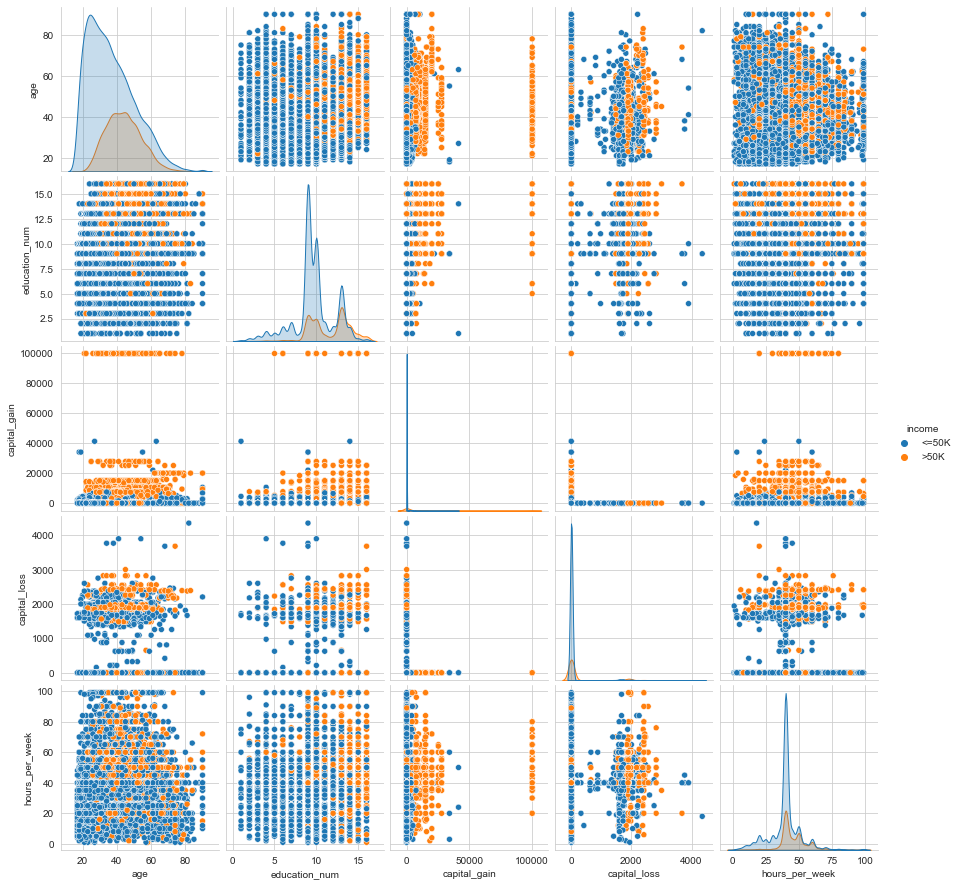

In [513]:
sns.pairplot(data=cleaned_data_df, hue='income')

In [514]:
cleaned_data_df['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

In [515]:
cleaned_data_df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [516]:
cleaned_data_df['marital_status'].value_counts()

Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital_status, dtype: int64

In [517]:
cleaned_data_df['sex'].value_counts()

Male      20380
Female     9782
Name: sex, dtype: int64

**1- What is the age average for each gender of the indevisuals with the income over 50K and at most 50K?**


In [518]:
cleaned_data_df.groupby(['income', 'sex'])['age'].mean()

income  sex   
<=50K   Female    36.231719
        Male      36.841390
>50K    Female    41.964928
        Male      44.305816
Name: age, dtype: float64

In [519]:
inc_sex_age=pd.pivot_table(cleaned_data_df.groupby(['income', 'sex'])['age'].mean().to_frame(), values='age', columns=['income', 'sex'])

In [520]:
inc_sex_age

income      <=50K                 >50K           
sex        Female      Male     Female       Male
age     36.231719  36.84139  41.964928  44.305816

<AxesSubplot:>

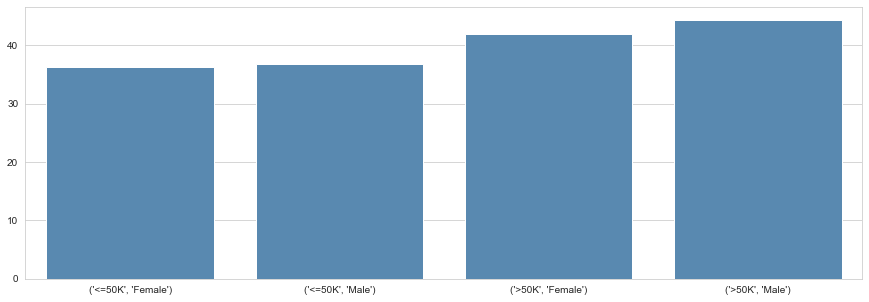

In [521]:
sns.set_style('whitegrid')
plt.subplots(figsize=(15,5))
sns.barplot(data=inc_sex_age, color='#4B8BBE')

In [522]:
cleaned_data_df.groupby(['income', 'sex'])['age'].count()

income  sex   
<=50K   Female     8670
        Male      13984
>50K    Female     1112
        Male       6396
Name: age, dtype: int64

In [523]:
males_o30_o50k=cleaned_data_df[(cleaned_data_df.age >= 30)&(cleaned_data_df.age <= 40)&(cleaned_data_df.income=='>50K')&(cleaned_data_df.sex=='Male')].count()[0]
females_o30_o50k=cleaned_data_df[(cleaned_data_df.age >= 30)&(cleaned_data_df.age <= 40)&(cleaned_data_df.income=='>50K')&(cleaned_data_df.sex=='Female')].count()[0]

print(males_o30_o50k,females_o30_o50k)

2089 415


In [524]:
males_o40_l50k = cleaned_data_df[(cleaned_data_df.age > 40)&(cleaned_data_df.income=='<=50K')&(cleaned_data_df.sex=='Male')].count()[0]
females_o40_l50k = cleaned_data_df[(cleaned_data_df.age > 40)&(cleaned_data_df.income=='<=50K')&(cleaned_data_df.sex=='Female')].count()[0]

print(males_o40_l50k,females_o40_l50k)

4851 3041


<BarContainer object of 4 artists>

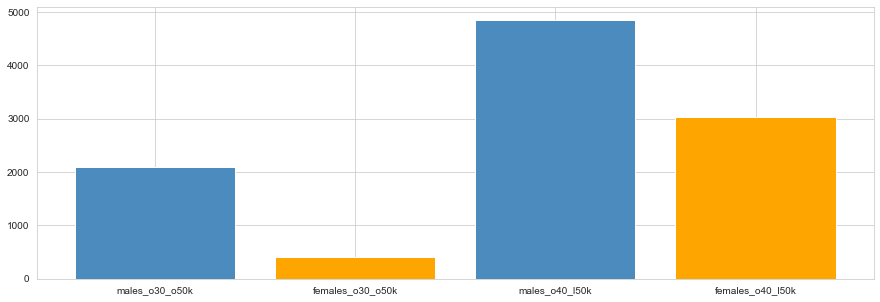

In [525]:
counts=[males_o30_o50k,females_o30_o50k,males_o40_l50k,females_o40_l50k]
x=['males_o30_o50k','females_o30_o50k','males_o40_l50k','females_o40_l50k']

sns.set_style('whitegrid')
plt.subplots(figsize=(15,5))
plt.bar(x, counts, width = 0.8, color = ['#4B8BBE', 'orange'])

**We can see here the following:**
1. The age average of the females and males, who are making 50Ks or less is between 30 and 40 years old. 
2. The age average of the females and males, who are making over 50Ks is over 40 years old. <br>


However, testing the above findings came up with intersting information:<br>
The males and females who are over 40 years old and making less than 50Ks a year are more than the males and females who are between 30 and 40 years old who are making over 50Ks a year. 

We can say that the age alone can't lead us to the right relation with the income increase or descreas. 

**2- In which work class both genders, who make over 50K or 50K or less a year, are mostly working in?**

In [526]:
grouped_l50k_male=cleaned_data_df.query('income == "<=50K" & sex == "Male"').groupby(['income', 'sex'])['workclass'].value_counts()
grouped_l50k_female=cleaned_data_df.query('income == "<=50K" & sex == "Female"').groupby(['income', 'sex'])['workclass'].value_counts()
grouped_o50k_male=cleaned_data_df.query('income == ">50K" & sex == "Male"').groupby(['income', 'sex'])['workclass'].value_counts()
grouped_o50k_female=cleaned_data_df.query('income == ">50K" & sex == "Female"').groupby(['income', 'sex'])['workclass'].value_counts()

In [527]:
#def plot_grouped(df):
#    df=df.to_frame()
#    df=df.rename(columns={'workclass':'counts'})
#    df=pd.pivot_table(df, values='counts', columns=['income', 'sex', 'workclass'])

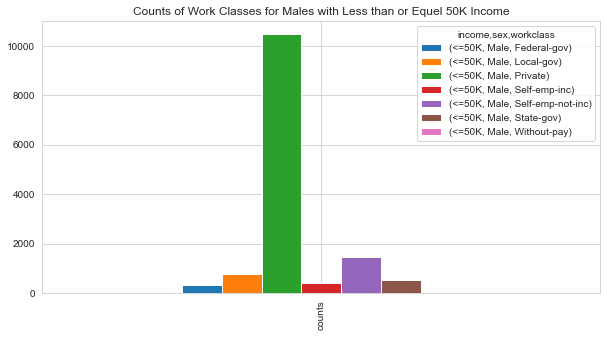

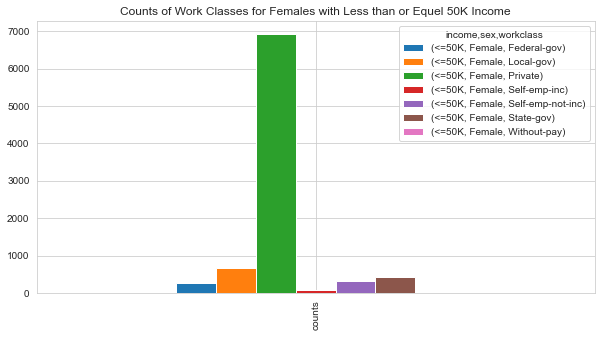

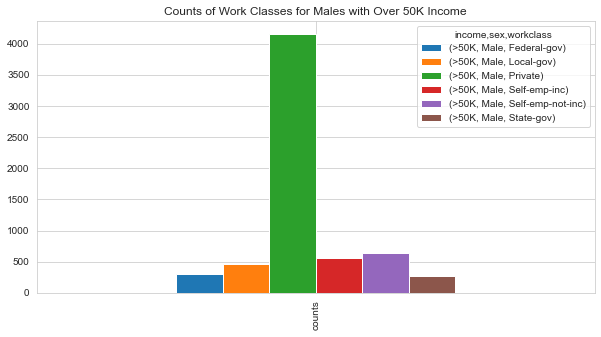

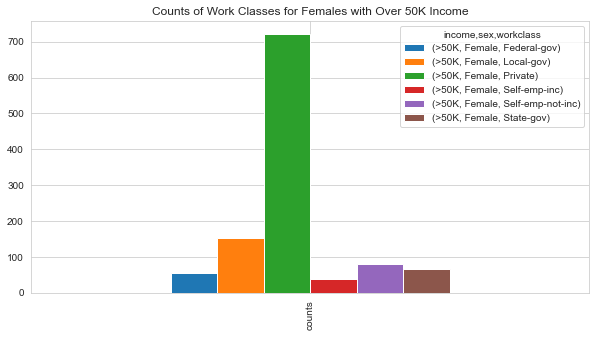

In [528]:
dfs = [grouped_l50k_male, grouped_l50k_female, grouped_o50k_male, grouped_o50k_female]
titles = ['Counts of Work Classes for Males with Less than or Equel 50K Income', 
          'Counts of Work Classes for Females with Less than or Equel 50K Income',
          'Counts of Work Classes for Males with Over 50K Income',
          'Counts of Work Classes for Females with Over 50K Income']
for i, j in zip(dfs, titles):
    i=i.to_frame()
    i=i.rename(columns={'workclass':'counts'})
    i=pd.pivot_table(i, values='counts', columns=['income', 'sex', 'workclass'])
    i.plot(kind='bar', figsize=(10,5), title=j)

From the above plot, we can find that the majority of the indivisuals in the dataset are working in the private sector wheither they make 50Ks or less or over 50Ks a year. This information can't lead us to know the real effect of the work class on the income.

**3- Do the Capital Gain and the Capital Loss data has any relationship with the income given values?**

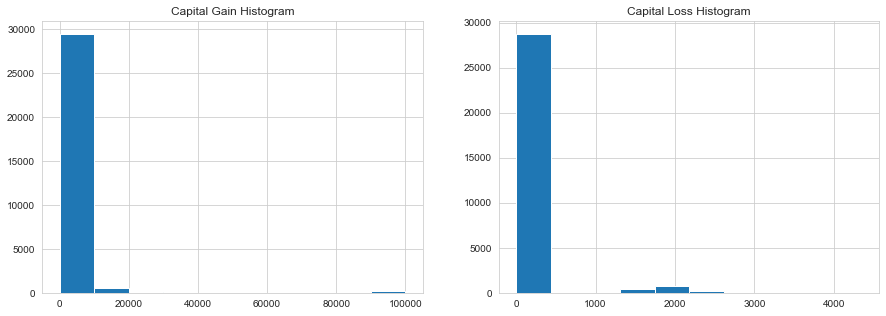

In [529]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
cleaned_data_df['capital_gain'].hist(ax=ax[0])
ax[0].title.set_text('Capital Gain Histogram')
cleaned_data_df['capital_loss'].hist(ax=ax[1])
ax[1].title.set_text('Capital Loss Histogram')

We can see here that the Capital Gain values are mostly between 0 and 20000 for the majority, while Capital Loss values are between 0 and 1000 for the majority. Additionally, we can see that the range of capital loss values are less than the range of the capital gain values. 

To have a better idea about the values distripution we will use the scatter plot:

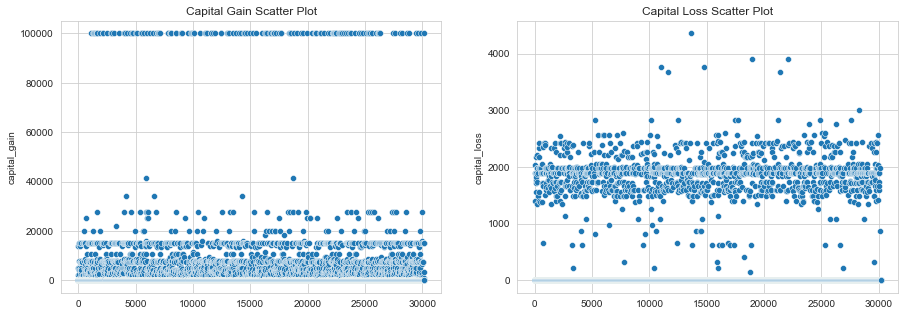

In [530]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
#df_CohBeh = pd.melt(cleaned_data_df, value_vars='income', var_name='melt')
sns.scatterplot(data=cleaned_data_df['capital_gain'], ax=ax[0])
ax[0].title.set_text('Capital Gain Scatter Plot')
sns.scatterplot(data=cleaned_data_df['capital_loss'], ax=ax[1])
ax[1].title.set_text('Capital Loss Scatter Plot')

**From the above scatter plot we can see the following:**
1. Most of the indivisuals in the dataset have Capital Gain between 0 and Less than 40,000.
2. The rest of the indivisuals in the dataset have Capital Gain value 100,000 (According to the data values).
3. Most of the indivisuals in the dataset have 0 Cpital Loss. 
4. There second majority of the indivisuals have Capital Loss between 1000 and 3000. 
5. The rest are scattered between 0 and 1000 and between 3000 and 4000+.

However, to answer the question to check the relation between the Capital Gain/Capital Loss and the income, we need to hue the income to have a better view:

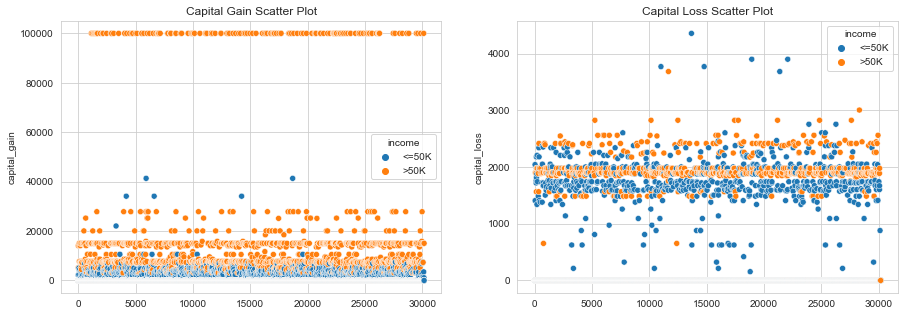

In [531]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
#df_CohBeh = pd.melt(cleaned_data_df, value_vars='income', var_name='melt')
sns.scatterplot(x=np.arange(cleaned_data_df['capital_gain'].count()), y=cleaned_data_df['capital_gain'], hue=cleaned_data_df['income'],  ax=ax[0])
ax[0].title.set_text('Capital Gain Scatter Plot')
sns.scatterplot(x=np.arange(cleaned_data_df['capital_loss'].count()), y=cleaned_data_df['capital_loss'], hue=cleaned_data_df['income'],  ax=ax[1])
ax[1].title.set_text('Capital Loss Scatter Plot')

Here we can find that the increase of the Capital Gain and the Capital Loss is happening when the income is greater than 50K. It indecates that the indivisuals with an income greater than 50Ks a year are active financially and gaining more than losing. 

## Building the Model

In [843]:
to_model_df = cleaned_data_df.copy()

Income column has the following values:
1. \>50K
2. <=50K

We need to encode the values into 1 and 0; it will be as the following:
1. 0 for <=50K
2. 1 for >50K 

In [844]:
to_model_df['income']=to_model_df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [845]:
to_model_df

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30158,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30159,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30160,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


### Encoding and transforming

From the histogram plot we have done to both ```'capital_gain', 'capital_loss'```, we can see that both are skewed do to the huge gap between values. For thie reason we are going to apply log transofrmation to the values in order to have a better accuracy in our model.

In [846]:
skewed = ['capital_gain', 'capital_loss']
modelDF_log_transformed = pd.DataFrame(data = to_model_df)
modelDF_log_transformed[skewed] = to_model_df[skewed].apply(lambda x: np.log(x + 1))
modelDF_log_transformed

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,38,United-States,0
30158,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,40,United-States,1
30159,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,40,United-States,0
30160,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,20,United-States,0


We will extract ```income``` column from the data frame in order to be our ```y``` (the output) in the model.

In [848]:
income=modelDF_log_transformed['income']
income

0        0
1        0
2        0
3        0
4        0
        ..
30157    0
30158    1
30159    0
30160    0
30161    1
Name: income, Length: 30162, dtype: int64

We need to encode the sex feature and drop one of the columns as one of them is enough:

In [849]:
sex_dummies = pd.get_dummies(modelDF_log_transformed['sex'], drop_first=True)
sex_dummies

,Male
0,1
1,1
2,1
3,1
4,0
...,...
30157,0
30158,1
30159,0
30160,1


Here we are going to drop both ```income and sex``` columns in order to:
1. Add the encoded sex values.
2. Keep income column as our output in the model.

In [850]:
modelDF_log_transformed.drop(columns=['income', 'sex'], inplace=True)

In [851]:
modelDF_log_transformed

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,7.684784,0.0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0.000000,0.0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0.000000,0.0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.000000,0.0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0.000000,0.0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0.000000,0.0,38,United-States
30158,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0.000000,0.0,40,United-States
30159,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0.000000,0.0,40,United-States
30160,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0.000000,0.0,20,United-States


In [852]:
modelDF_log_transformed = pd.get_dummies(modelDF_log_transformed)
modelDF_log_transformed['sex'] = sex_dummies
modelDF_log_transformed

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,sex
0,39,13,7.684784,0.0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,50,13,0.000000,0.0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,38,9,0.000000,0.0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,53,7,0.000000,0.0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,13,0.000000,0.0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,12,0.000000,0.0,38,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30158,40,9,0.000000,0.0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
30159,58,9,0.000000,0.0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30160,22,9,0.000000,0.0,20,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [882]:
final_df = modelDF_log_transformed.copy()

### Splitting

We are going to split our data into train and test data:

In [870]:
X=final_df
y=income

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)


### Modeling

**Fitting the data in the logistic regression model:**

In [871]:
lg_reg=LogisticRegression()
lg_reg.fit(X_train, y_train)

C:\Users\alihh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Prediction:

In [873]:
y_pred=lg_reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

**Scores:**

Traing score:

In [872]:
lg_reg.score(X_train,y_train)

0.8364623482116955

Testing Score:

In [874]:
lg_reg.score(X_test,y_test)

0.8387203712912316

Confusion matrix:

In [875]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[4157  346]
 [ 627  903]]


Log Loss:

In [877]:
y_pred_proba = lg_reg.predict_proba(X_test)

In [878]:
from sklearn.metrics import log_loss
log_loss(y_pred,y_pred_proba)

0.19223799069970746

Classification Report:

In [879]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred), sep="\n")

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4503
           1       0.72      0.59      0.65      1530

    accuracy                           0.84      6033
   macro avg       0.80      0.76      0.77      6033
weighted avg       0.83      0.84      0.83      6033

